In [ ]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("/content/Motor Claim Simulation - frauds.xlsx - Sheet1.csv")

In [ ]:
df = df.drop(['Motor Claims Data ','Unnamed: 1','Unnamed: 2','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'],axis=1)

In [ ]:
df = df.rename(columns={'Unnamed: 3': 'OEM', 'Unnamed: 4': 'Model','Unnamed: 5': 'Original Price','Unnamed: 6': 
                       'Vehicle Age','Unnamed: 7': 'IDV','Unnamed: 8': 'Policy Dt','Unnamed: 9': 'Accident Dt','Unnamed: 10': 'Report Dt',
                       'Unnamed: 11': 'Policy_Accident','Unnamed: 12': 'Policy_Report','Unnamed: 13': 'Accident_Report','Unnamed: 14': 'Prediction'})

In [ ]:
df.columns

Index(['OEM', 'Model', 'Original Price', 'Vehicle Age', 'IDV', 'Policy Dt',
       'Accident Dt', 'Report Dt', 'Policy_Accident', 'Policy_Report',
       'Accident_Report', 'Prediction'],
      dtype='object')

In [ ]:
df.head()

,OEM,Model,Original Price,Vehicle Age,IDV,Policy Dt,Accident Dt,Report Dt,Policy_Accident,Policy_Report,Accident_Report,Prediction
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.5%
1,OEM,Model,Original Price,Vehicle Age,IDV,Policy Dt,Accident Dt,Report Dt,Policy_Accident,Policy_Report,Accident_Report,Tampered Docs
2,Hero,M4,"100,000",3,"61,413",30-Apr-22,1-May-22,2-May-22,1,2,1,0
3,Honda,M3,"90,000",1,"76,500",11-Jun-22,19-Aug-22,21-Aug-22,69,71,2,0
4,Honda,M2,"72,000",3,"44,217",4-Apr-22,22-May-22,23-May-22,48,49,1,0


In [ ]:
df = df.drop(0)
df = df.drop(1)

In [ ]:
df1 = df.drop(['Policy Dt','Accident Dt','Report Dt'],axis=1)

In [ ]:
df1.head()

,OEM,Model,Original Price,Vehicle Age,IDV,Policy_Accident,Policy_Report,Accident_Report,Prediction
2,Hero,M4,"100,000",3,"61,413",1,2,1,0
3,Honda,M3,"90,000",1,"76,500",69,71,2,0
4,Honda,M2,"72,000",3,"44,217",48,49,1,0
5,TVS,M1,"45,000",1,"38,250",94,95,1,0
6,Honda,M3,"90,000",1,"76,500",25,27,2,0


In [ ]:
df['OEM'].unique()

array(['Hero', 'Honda', 'TVS'], dtype=object)

In [ ]:
 df1.Model = df1.Model.replace({'M1': 1,'M2': 2,'M3': 3,'M4': 4})
 df1.OEM = df1.OEM.replace({'Hero': 1,'Honda': 2,'TVS': 3})

In [ ]:
df1.head()

,OEM,Model,Original Price,Vehicle Age,IDV,Policy_Accident,Policy_Report,Accident_Report,Prediction
2,1,4,"100,000",3,"61,413",1,2,1,0
3,2,3,"90,000",1,"76,500",69,71,2,0
4,2,2,"72,000",3,"44,217",48,49,1,0
5,3,1,"45,000",1,"38,250",94,95,1,0
6,2,3,"90,000",1,"76,500",25,27,2,0


In [ ]:
df1.columns

Index(['OEM', 'Model', 'Original Price', 'Vehicle Age', 'IDV',
       'Policy_Accident', 'Policy_Report', 'Accident_Report', 'Prediction'],
      dtype='object')

In [ ]:
import re
def Converting(str1):
  result = re.sub(r"[^\d]", "", str1)
  return int(result)

df1['Original Price'] = df1['Original Price'].apply(lambda x: Converting(x))
df1['IDV'] = df1['IDV'].apply(lambda x: Converting(x))

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 2 to 19998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   OEM              19997 non-null  int64 
 1   Model            19997 non-null  int64 
 2   Original Price   19997 non-null  int64 
 3   Vehicle Age      19997 non-null  object
 4   IDV              19997 non-null  int64 
 5   Policy_Accident  19997 non-null  object
 6   Policy_Report    19997 non-null  object
 7   Accident_Report  19997 non-null  object
 8   Prediction       19997 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.5+ MB


In [ ]:
# df1['Original Price'] = df1['Original Price'].astype(int)
df1['Vehicle Age'] = df1['Vehicle Age'].astype(int)
# df1['IDV'] = df1['IDV'].astype(int)
df1['Policy_Accident'] = df1['Policy_Accident'].astype(int)
df1['Policy_Report'] = df1['Policy_Report'].astype(int)
df1['Accident_Report'] = df1['Accident_Report'].astype(int)
df1['Prediction'] = df1['Prediction'].astype(int)

In [ ]:
#Tampered Docs	
#Inflated Invoice	
#Fraud Lingo	
#Inconsistency	
#Claims History	
#CIBIL Score	
#Intermediary 	
#Close Proximity	
#Market Roll Over	
#DL Repeat	
#Inconsistency

# Tampered Docs Prediction

In [ ]:
X = df1.drop('Prediction',axis=1)
Y = df1['Prediction']

In [ ]:
X 

,OEM,Model,Original Price,Vehicle Age,IDV,Policy_Accident,Policy_Report,Accident_Report
2,1,4,100000,3,61413,1,2,1
3,2,3,90000,1,76500,69,71,2
4,2,2,72000,3,44217,48,49,1
5,3,1,45000,1,38250,94,95,1
6,2,3,90000,1,76500,25,27,2
...,...,...,...,...,...,...,...,...
19994,3,1,45000,2,32513,38,43,5
19995,3,1,45000,1,38250,49,51,2
19996,1,3,75000,4,39150,87,89,2
19997,1,4,100000,1,85000,19,22,3


In [ ]:
Y

2        0
3        0
4        0
5        0
6        0
        ..
19994    0
19995    0
19996    0
19997    0
19998    0
Name: Prediction, Length: 19997, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [ ]:
print("Size of X Train:- " + str(X_train.shape))
print("Size of X Test:- " + str(X_test.shape))
print("Size of Y Train:- " + str(y_train.shape))
print("Size of Y Test:- " + str(y_test.shape))

Size of X Train:- (15997, 8)
Size of X Test:- (4000, 8)
Size of Y Train:- (15997,)
Size of Y Test:- (4000,)


In [ ]:
reg_rf = RandomForestClassifier(max_depth=180,min_samples_split= 5,n_estimators= 152)
reg_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=180, min_samples_split=5, n_estimators=152)

In [ ]:
y_pred_1 = reg_rf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3603
           1       0.07      0.01      0.02       397

    accuracy                           0.89      4000
   macro avg       0.49      0.50      0.48      4000
weighted avg       0.82      0.89      0.85      4000



In [ ]:
with open('Tampered.pkl', 'wb') as f:
    pickle.dump(reg_rf, f)

# Inflated Invoice Prediction

In [ ]:
df2 = pd.read_csv('/content/Motor Claim Simulation - frauds.xlsx - Sheet1.csv')

In [ ]:
df2 = df2.drop(['Motor Claims Data ','Unnamed: 1','Unnamed: 2','Unnamed: 14','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'],axis=1)

In [ ]:
df2 = df2.rename(columns={'Unnamed: 3': 'OEM', 'Unnamed: 4': 'Model','Unnamed: 5': 'Original Price','Unnamed: 6': 
                       'Vehicle Age','Unnamed: 7': 'IDV','Unnamed: 8': 'Policy Dt','Unnamed: 9': 'Accident Dt','Unnamed: 10': 'Report Dt',
                       'Unnamed: 11': 'Policy_Accident','Unnamed: 12': 'Policy_Report','Unnamed: 13': 'Accident_Report','Unnamed: 15': 'Prediction'})

In [ ]:
df2 = df2.drop(0)
df2 = df2.drop(1)

In [ ]:
df2.head()

,OEM,Model,Original Price,Vehicle Age,IDV,Policy Dt,Accident Dt,Report Dt,Policy_Accident,Policy_Report,Accident_Report,Prediction
2,Hero,M4,"100,000",3,"61,413",30-Apr-22,1-May-22,2-May-22,1,2,1,0
3,Honda,M3,"90,000",1,"76,500",11-Jun-22,19-Aug-22,21-Aug-22,69,71,2,0
4,Honda,M2,"72,000",3,"44,217",4-Apr-22,22-May-22,23-May-22,48,49,1,0
5,TVS,M1,"45,000",1,"38,250",9-Jun-22,11-Sep-22,12-Sep-22,94,95,1,0
6,Honda,M3,"90,000",1,"76,500",13-Apr-22,8-May-22,10-May-22,25,27,2,0


In [ ]:
df2.Model = df2.Model.replace({'M1': 1,'M2': 2,'M3': 3,'M4': 4})
df2.OEM = df2.OEM.replace({'Hero': 1,'Honda': 2,'TVS': 3})
df2['Vehicle Age'] = df2['Vehicle Age'].astype(int)
df2['Policy_Accident'] = df2['Policy_Accident'].astype(int)
df2['Policy_Report'] = df2['Policy_Report'].astype(int)
df2['Accident_Report'] = df2['Accident_Report'].astype(int)
df2['Prediction'] = df2['Prediction'].astype(int)

In [ ]:
df2 = df2.drop(['Policy Dt','Accident Dt','Report Dt'],axis=1)

In [ ]:
import re
def Converting(str1):
  result = re.sub(r"[^\d]", "", str1)
  return int(result)

df2['Original Price'] = df2['Original Price'].apply(lambda x: Converting(x))
df2['IDV'] = df2['IDV'].apply(lambda x: Converting(x))

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 2 to 19998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   OEM              19997 non-null  int64
 1   Model            19997 non-null  int64
 2   Original Price   19997 non-null  int64
 3   Vehicle Age      19997 non-null  int64
 4   IDV              19997 non-null  int64
 5   Policy_Accident  19997 non-null  int64
 6   Policy_Report    19997 non-null  int64
 7   Accident_Report  19997 non-null  int64
 8   Prediction       19997 non-null  int64
dtypes: int64(9)
memory usage: 1.5 MB


In [ ]:
X = df2.drop('Prediction',axis=1)
Y = df2['Prediction']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Size of X Train:- " + str(X_train.shape))
print("Size of X Test:- " + str(X_test.shape))
print("Size of Y Train:- " + str(y_train.shape))
print("Size of Y Test:- " + str(y_test.shape))
reg_rf = RandomForestClassifier(max_depth=180,min_samples_split= 5,n_estimators= 152)
reg_rf.fit(X_train, y_train)
y_pred_1 = reg_rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred_1))

Size of X Train:- (15997, 8)
Size of X Test:- (4000, 8)
Size of Y Train:- (15997,)
Size of Y Test:- (4000,)
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3545
           1       0.07      0.01      0.02       455

    accuracy                           0.87      4000
   macro avg       0.48      0.50      0.47      4000
weighted avg       0.79      0.87      0.83      4000



In [ ]:
with open('Inflaited.pkl', 'wb') as f:
    pickle.dump(reg_rf, f)

# Fraud Lingo	Prediction


In [ ]:
df3 = pd.read_csv('/content/Motor Claim Simulation - frauds.xlsx - Sheet1.csv')
df3 = df3.drop(['Motor Claims Data ','Unnamed: 1','Unnamed: 2','Unnamed: 14','Unnamed: 15','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'],axis=1)
df3 = df3.rename(columns={'Unnamed: 3': 'OEM', 'Unnamed: 4': 'Model','Unnamed: 5': 'Original Price','Unnamed: 6': 
                       'Vehicle Age','Unnamed: 7': 'IDV','Unnamed: 8': 'Policy Dt','Unnamed: 9': 'Accident Dt','Unnamed: 10': 'Report Dt',
                       'Unnamed: 11': 'Policy_Accident','Unnamed: 12': 'Policy_Report','Unnamed: 13': 'Accident_Report','Unnamed: 16': 'Prediction'})
df3 = df3.drop(0)
df3 = df3.drop(1)
df3.Model = df3.Model.replace({'M1': 1,'M2': 2,'M3': 3,'M4': 4})
df3.OEM = df3.OEM.replace({'Hero': 1,'Honda': 2,'TVS': 3})
df3['Vehicle Age'] = df3['Vehicle Age'].astype(int)
df3['Policy_Accident'] = df3['Policy_Accident'].astype(int)
df3['Policy_Report'] = df3['Policy_Report'].astype(int)
df3['Accident_Report'] = df3['Accident_Report'].astype(int)
df3['Prediction'] = df3['Prediction'].astype(int)
df3 = df3.drop(['Policy Dt','Accident Dt','Report Dt'],axis=1)
import re
def Converting(str1):
  result = re.sub(r"[^\d]", "", str1)
  return int(result)

df3['Original Price'] = df3['Original Price'].apply(lambda x: Converting(x))
df3['IDV'] = df3['IDV'].apply(lambda x: Converting(x))

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 2 to 19998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   OEM              19997 non-null  int64
 1   Model            19997 non-null  int64
 2   Original Price   19997 non-null  int64
 3   Vehicle Age      19997 non-null  int64
 4   IDV              19997 non-null  int64
 5   Policy_Accident  19997 non-null  int64
 6   Policy_Report    19997 non-null  int64
 7   Accident_Report  19997 non-null  int64
 8   Prediction       19997 non-null  int64
dtypes: int64(9)
memory usage: 1.5 MB


In [ ]:
X = df3.drop('Prediction',axis=1)
Y = df3['Prediction']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Size of X Train:- " + str(X_train.shape))
print("Size of X Test:- " + str(X_test.shape))
print("Size of Y Train:- " + str(y_train.shape))
print("Size of Y Test:- " + str(y_test.shape))
reg_rf = RandomForestClassifier(max_depth=180,min_samples_split= 5,n_estimators= 152)
reg_rf.fit(X_train, y_train)
y_pred_1 = reg_rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred_1))

Size of X Train:- (15997, 8)
Size of X Test:- (4000, 8)
Size of Y Train:- (15997,)
Size of Y Test:- (4000,)
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3814
           1       0.00      0.00      0.00       186

    accuracy                           0.95      4000
   macro avg       0.48      0.50      0.49      4000
weighted avg       0.91      0.95      0.93      4000



In [ ]:
with open('FraudLingo.pkl', 'wb') as f:
    pickle.dump(reg_rf, f)

# Inconsistency Prediction

In [ ]:
df4 = pd.read_csv('/content/Motor Claim Simulation - frauds.xlsx - Sheet1.csv')
df4 = df4.drop(['Motor Claims Data ','Unnamed: 1','Unnamed: 2','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'],axis=1)
df4 = df4.rename(columns={'Unnamed: 3': 'OEM', 'Unnamed: 4': 'Model','Unnamed: 5': 'Original Price','Unnamed: 6': 
                       'Vehicle Age','Unnamed: 7': 'IDV','Unnamed: 8': 'Policy Dt','Unnamed: 9': 'Accident Dt','Unnamed: 10': 'Report Dt',
                       'Unnamed: 11': 'Policy_Accident','Unnamed: 12': 'Policy_Report','Unnamed: 13': 'Accident_Report','Unnamed: 17': 'Prediction'})
df4 = df4.drop(0)
df4 = df4.drop(1)
df4.Model = df4.Model.replace({'M1': 1,'M2': 2,'M3': 3,'M4': 4})
df4.OEM = df4.OEM.replace({'Hero': 1,'Honda': 2,'TVS': 3})
df4['Vehicle Age'] = df4['Vehicle Age'].astype(int)
df4['Policy_Accident'] = df4['Policy_Accident'].astype(int)
df4['Policy_Report'] = df4['Policy_Report'].astype(int)
df4['Accident_Report'] = df4['Accident_Report'].astype(int)
df4['Prediction'] = df4['Prediction'].astype(int)
df4 = df4.drop(['Policy Dt','Accident Dt','Report Dt'],axis=1)
import re
def Converting(str1):
  result = re.sub(r"[^\d]", "", str1)
  return int(result)

df4['Original Price'] = df4['Original Price'].apply(lambda x: Converting(x))
df4['IDV'] = df4['IDV'].apply(lambda x: Converting(x))

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 2 to 19998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   OEM              19997 non-null  int64
 1   Model            19997 non-null  int64
 2   Original Price   19997 non-null  int64
 3   Vehicle Age      19997 non-null  int64
 4   IDV              19997 non-null  int64
 5   Policy_Accident  19997 non-null  int64
 6   Policy_Report    19997 non-null  int64
 7   Accident_Report  19997 non-null  int64
 8   Prediction       19997 non-null  int64
dtypes: int64(9)
memory usage: 1.5 MB


In [ ]:
X = df4.drop('Prediction',axis=1)
Y = df4['Prediction']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Size of X Train:- " + str(X_train.shape))
print("Size of X Test:- " + str(X_test.shape))
print("Size of Y Train:- " + str(y_train.shape))
print("Size of Y Test:- " + str(y_test.shape))
reg_rf = RandomForestClassifier(max_depth=180,min_samples_split= 5,n_estimators= 152)
reg_rf.fit(X_train, y_train)
y_pred_1 = reg_rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred_1))

Size of X Train:- (15997, 8)
Size of X Test:- (4000, 8)
Size of Y Train:- (15997,)
Size of Y Test:- (4000,)
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3892
           1       0.11      0.01      0.02       108

    accuracy                           0.97      4000
   macro avg       0.54      0.50      0.50      4000
weighted avg       0.95      0.97      0.96      4000



# Claims History Prediction

In [ ]:
import pandas as pd
import re

df5 = pd.read_csv('/content/Motor Claim Simulation - frauds.xlsx - Sheet1.csv')
df5 = df5.drop(['Motor Claims Data ','Unnamed: 1','Unnamed: 2','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'],axis=1)
df5 = df5.rename(columns={'Unnamed: 3': 'OEM', 'Unnamed: 4': 'Model','Unnamed: 5': 'Original Price','Unnamed: 6': 
                       'Vehicle Age','Unnamed: 7': 'IDV','Unnamed: 8': 'Policy Dt','Unnamed: 9': 'Accident Dt','Unnamed: 10': 'Report Dt',
                       'Unnamed: 11': 'Policy_Accident','Unnamed: 12': 'Policy_Report','Unnamed: 13': 'Accident_Report','Unnamed: 18': 'Prediction'})
df5 = df5.drop(0)
df5 = df5.drop(1)
df5.Model = df5.Model.replace({'M1': 1,'M2': 2,'M3': 3,'M4': 4})
df5.OEM = df5.OEM.replace({'Hero': 1,'Honda': 2,'TVS': 3})
df5['Vehicle Age'] = df5['Vehicle Age'].astype(int)
df5['Policy_Accident'] = df5['Policy_Accident'].astype(int)
df5['Policy_Report'] = df5['Policy_Report'].astype(int)
df5['Accident_Report'] = df5['Accident_Report'].astype(int)
df5['Prediction'] = df5['Prediction'].astype(int)
df5 = df5.drop(['Policy Dt','Accident Dt','Report Dt'],axis=1)

def Converting(str1):
    result = re.sub(r"[^\d]", "", str1)
    return int(result)

df5['Original Price'] = df5['Original Price'].apply(lambda x: Converting(x))
df5['IDV'] = df5['IDV'].apply(lambda x: Converting(x))

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 2 to 19998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   OEM              19997 non-null  int64
 1   Model            19997 non-null  int64
 2   Original Price   19997 non-null  int64
 3   Vehicle Age      19997 non-null  int64
 4   IDV              19997 non-null  int64
 5   Policy_Accident  19997 non-null  int64
 6   Policy_Report    19997 non-null  int64
 7   Accident_Report  19997 non-null  int64
 8   Prediction       19997 non-null  int64
dtypes: int64(9)
memory usage: 1.5 MB


In [ ]:
X = df5.drop('Prediction',axis=1)
Y = df5['Prediction']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Size of X Train:- " + str(X_train.shape))
print("Size of X Test:- " + str(X_test.shape))
print("Size of Y Train:- " + str(y_train.shape))
print("Size of Y Test:- " + str(y_test.shape))
reg_rf = RandomForestClassifier(max_depth=180,min_samples_split= 5,n_estimators= 152)
reg_rf.fit(X_train, y_train)
y_pred_1 = reg_rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred_1))

Size of X Train:- (15997, 8)
Size of X Test:- (4000, 8)
Size of Y Train:- (15997,)
Size of Y Test:- (4000,)
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3778
           1       0.10      0.01      0.02       222

    accuracy                           0.94      4000
   macro avg       0.52      0.50      0.49      4000
weighted avg       0.90      0.94      0.92      4000



In [ ]:
with open('ClaimsH.pkl', 'wb') as f:
    pickle.dump(reg_rf, f)

# CIBIL Score Prediction

In [ ]:
import pandas as pd
import re

df6 = pd.read_csv('/content/Motor Claim Simulation - frauds.xlsx - Sheet1.csv')
df6 = df6.drop(['Motor Claims Data ','Unnamed: 1','Unnamed: 2','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 18','Unnamed: 17','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'],axis=1)
df6 = df6.rename(columns={'Unnamed: 3': 'OEM', 'Unnamed: 4': 'Model','Unnamed: 5': 'Original Price','Unnamed: 6': 
                       'Vehicle Age','Unnamed: 7': 'IDV','Unnamed: 8': 'Policy Dt','Unnamed: 9': 'Accident Dt','Unnamed: 10': 'Report Dt',
                       'Unnamed: 11': 'Policy_Accident','Unnamed: 12': 'Policy_Report','Unnamed: 13': 'Accident_Report','Unnamed: 19': 'Prediction'})
df6 = df6.drop(0)
df6 = df6.drop(1)
df6.Model = df6.Model.replace({'M1': 1,'M2': 2,'M3': 3,'M4': 4})
df6.OEM = df6.OEM.replace({'Hero': 1,'Honda': 2,'TVS': 3})
df6['Vehicle Age'] = df6['Vehicle Age'].astype(int)
df6['Policy_Accident'] = df6['Policy_Accident'].astype(int)
df6['Policy_Report'] = df6['Policy_Report'].astype(int)
df6['Accident_Report'] = df6['Accident_Report'].astype(int)
df6['Prediction'] = df6['Prediction'].astype(int)
df6 = df6.drop(['Policy Dt','Accident Dt','Report Dt'],axis=1)

def Converting(str1):
    result = re.sub(r"[^\d]", "", str1)
    return int(result)

df6['Original Price'] = df6['Original Price'].apply(lambda x: Converting(x))
df6['IDV'] = df6['IDV'].apply(lambda x: Converting(x))


In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 2 to 19998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   OEM              19997 non-null  int64
 1   Model            19997 non-null  int64
 2   Original Price   19997 non-null  int64
 3   Vehicle Age      19997 non-null  int64
 4   IDV              19997 non-null  int64
 5   Policy_Accident  19997 non-null  int64
 6   Policy_Report    19997 non-null  int64
 7   Accident_Report  19997 non-null  int64
 8   Prediction       19997 non-null  int64
dtypes: int64(9)
memory usage: 1.5 MB


In [ ]:
X = df6.drop('Prediction',axis=1)
Y = df6['Prediction']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Size of X Train:- " + str(X_train.shape))
print("Size of X Test:- " + str(X_test.shape))
print("Size of Y Train:- " + str(y_train.shape))
print("Size of Y Test:- " + str(y_test.shape))
reg_rf = RandomForestClassifier(max_depth=180,min_samples_split= 5,n_estimators= 152)
reg_rf.fit(X_train, y_train)
y_pred_1 = reg_rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred_1))

Size of X Train:- (15997, 8)
Size of X Test:- (4000, 8)
Size of Y Train:- (15997,)
Size of Y Test:- (4000,)
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3803
           1       0.11      0.01      0.02       197

    accuracy                           0.95      4000
   macro avg       0.53      0.50      0.50      4000
weighted avg       0.91      0.95      0.93      4000



In [ ]:
with open('cibil.pkl', 'wb') as f:
    pickle.dump(reg_rf, f)

# Intermediary Prediction

In [ ]:
import pandas as pd
import re

df7 = pd.read_csv('/content/Motor Claim Simulation - frauds.xlsx - Sheet1.csv')
df7 = df7.drop(['Motor Claims Data ','Unnamed: 1','Unnamed: 2','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 18','Unnamed: 19','Unnamed: 17','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'],axis=1)
df7 = df7.rename(columns={'Unnamed: 3': 'OEM', 'Unnamed: 4': 'Model','Unnamed: 5': 'Original Price','Unnamed: 6': 
                       'Vehicle Age','Unnamed: 7': 'IDV','Unnamed: 8': 'Policy Dt','Unnamed: 9': 'Accident Dt','Unnamed: 10': 'Report Dt',
                       'Unnamed: 11': 'Policy_Accident','Unnamed: 12': 'Policy_Report','Unnamed: 13': 'Accident_Report','Unnamed: 20': 'Prediction'})
df7 = df7.drop(0)
df7 = df7.drop(1)
df7.Model = df7.Model.replace({'M1': 1,'M2': 2,'M3': 3,'M4': 4})
df7.OEM = df7.OEM.replace({'Hero': 1,'Honda': 2,'TVS': 3})
df7['Vehicle Age'] = df7['Vehicle Age'].astype(int)
df7['Policy_Accident'] = df7['Policy_Accident'].astype(int)
df7['Policy_Report'] = df7['Policy_Report'].astype(int)
df7['Accident_Report'] = df7['Accident_Report'].astype(int)
df7['Prediction'] = df7['Prediction'].astype(int)
df7 = df7.drop(['Policy Dt','Accident Dt','Report Dt'],axis=1)

def Converting(str1):
    result = re.sub(r"[^\d]", "", str1)
    return int(result)

df7['Original Price'] = df7['Original Price'].apply(lambda x: Converting(x))
df7['IDV'] = df7['IDV'].apply(lambda x: Converting(x))


In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 2 to 19998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   OEM              19997 non-null  int64
 1   Model            19997 non-null  int64
 2   Original Price   19997 non-null  int64
 3   Vehicle Age      19997 non-null  int64
 4   IDV              19997 non-null  int64
 5   Policy_Accident  19997 non-null  int64
 6   Policy_Report    19997 non-null  int64
 7   Accident_Report  19997 non-null  int64
 8   Prediction       19997 non-null  int64
dtypes: int64(9)
memory usage: 1.5 MB


In [ ]:
X = df7.drop('Prediction',axis=1)
Y = df7['Prediction']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Size of X Train:- " + str(X_train.shape))
print("Size of X Test:- " + str(X_test.shape))
print("Size of Y Train:- " + str(y_train.shape))
print("Size of Y Test:- " + str(y_test.shape))
reg_rf = RandomForestClassifier(max_depth=180,min_samples_split= 5,n_estimators= 152)
reg_rf.fit(X_train, y_train)
y_pred_1 = reg_rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred_1))

Size of X Train:- (15997, 8)
Size of X Test:- (4000, 8)
Size of Y Train:- (15997,)
Size of Y Test:- (4000,)
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3594
           1       0.13      0.02      0.03       406

    accuracy                           0.89      4000
   macro avg       0.51      0.50      0.49      4000
weighted avg       0.82      0.89      0.85      4000



In [ ]:
with open('Interprox.pkl', 'wb') as f:
    pickle.dump(reg_rf, f)

# Close Proximity Prediction

In [ ]:
import pandas as pd
import re

df8 = pd.read_csv('/content/Motor Claim Simulation - frauds.xlsx - Sheet1.csv')
df8 = df8.drop(['Motor Claims Data ','Unnamed: 1','Unnamed: 2','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 17','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'],axis=1)
df8 = df8.rename(columns={'Unnamed: 3': 'OEM', 'Unnamed: 4': 'Model','Unnamed: 5': 'Original Price','Unnamed: 6': 
                       'Vehicle Age','Unnamed: 7': 'IDV','Unnamed: 8': 'Policy Dt','Unnamed: 9': 'Accident Dt','Unnamed: 10': 'Report Dt',
                       'Unnamed: 11': 'Policy_Accident','Unnamed: 12': 'Policy_Report','Unnamed: 13': 'Accident_Report','Unnamed: 21': 'Prediction'})
df8 = df8.drop(0)
df8 = df8.drop(1)
df8.Model = df8.Model.replace({'M1': 1,'M2': 2,'M3': 3,'M4': 4})
df8.OEM = df8.OEM.replace({'Hero': 1,'Honda': 2,'TVS': 3})
df8['Vehicle Age'] = df8['Vehicle Age'].astype(int)
df8['Policy_Accident'] = df8['Policy_Accident'].astype(int)
df8['Policy_Report'] = df8['Policy_Report'].astype(int)
df8['Accident_Report'] = df8['Accident_Report'].astype(int)
df8['Prediction'] = df8['Prediction'].astype(int)
df8 = df8.drop(['Policy Dt','Accident Dt','Report Dt'],axis=1)

def Converting(str1):
    result = re.sub(r"[^\d]", "", str1)
    return int(result)

df8['Original Price'] = df8['Original Price'].apply(lambda x: Converting(x))
df8['IDV'] = df8['IDV'].apply(lambda x: Converting(x))

In [ ]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 2 to 19998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   OEM              19997 non-null  int64
 1   Model            19997 non-null  int64
 2   Original Price   19997 non-null  int64
 3   Vehicle Age      19997 non-null  int64
 4   IDV              19997 non-null  int64
 5   Policy_Accident  19997 non-null  int64
 6   Policy_Report    19997 non-null  int64
 7   Accident_Report  19997 non-null  int64
 8   Prediction       19997 non-null  int64
dtypes: int64(9)
memory usage: 1.5 MB


In [ ]:
X = df8.drop('Prediction',axis=1)
Y = df8['Prediction']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Size of X Train:- " + str(X_train.shape))
print("Size of X Test:- " + str(X_test.shape))
print("Size of Y Train:- " + str(y_train.shape))
print("Size of Y Test:- " + str(y_test.shape))
reg_rf = RandomForestClassifier(max_depth=180,min_samples_split= 5,n_estimators= 152)
reg_rf.fit(X_train, y_train)
y_pred_1 = reg_rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred_1))

Size of X Train:- (15997, 8)
Size of X Test:- (4000, 8)
Size of Y Train:- (15997,)
Size of Y Test:- (4000,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3700
           1       1.00      1.00      1.00       300

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [ ]:
with open('cibil.pkl', 'wb') as f:
    pickle.dump(reg_rf, f)

# Market Roll Over Prediction

In [ ]:
import pandas as pd
import re

df9 = pd.read_csv('/content/Motor Claim Simulation - frauds.xlsx - Sheet1.csv')
df9 = df9.drop(['Motor Claims Data ','Unnamed: 1','Unnamed: 2','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 17','Unnamed: 23','Unnamed: 24','Unnamed: 25'],axis=1)
df9 = df9.rename(columns={'Unnamed: 3': 'OEM', 'Unnamed: 4': 'Model','Unnamed: 5': 'Original Price','Unnamed: 6': 
                       'Vehicle Age','Unnamed: 7': 'IDV','Unnamed: 8': 'Policy Dt','Unnamed: 9': 'Accident Dt','Unnamed: 10': 'Report Dt',
                       'Unnamed: 11': 'Policy_Accident','Unnamed: 12': 'Policy_Report','Unnamed: 13': 'Accident_Report','Unnamed: 22': 'Prediction'})
df9 = df9.drop(0)
df9 = df9.drop(1)
df9.Model = df9.Model.replace({'M1': 1,'M2': 2,'M3': 3,'M4': 4})
df9.OEM = df9.OEM.replace({'Hero': 1,'Honda': 2,'TVS': 3})
df9['Vehicle Age'] = df9['Vehicle Age'].astype(int)
df9['Policy_Accident'] = df9['Policy_Accident'].astype(int)
df9['Policy_Report'] = df9['Policy_Report'].astype(int)
df9['Accident_Report'] = df9['Accident_Report'].astype(int)
df9['Prediction'] = df9['Prediction'].astype(int)
df9 = df9.drop(['Policy Dt','Accident Dt','Report Dt'],axis=1)

def Converting(str1):
    result = re.sub(r"[^\d]", "", str1)
    return int(result)

df9['Original Price'] = df9['Original Price'].apply(lambda x: Converting(x))
df9['IDV'] = df9['IDV'].apply(lambda x: Converting(x))


In [ ]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 2 to 19998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   OEM              19997 non-null  int64
 1   Model            19997 non-null  int64
 2   Original Price   19997 non-null  int64
 3   Vehicle Age      19997 non-null  int64
 4   IDV              19997 non-null  int64
 5   Policy_Accident  19997 non-null  int64
 6   Policy_Report    19997 non-null  int64
 7   Accident_Report  19997 non-null  int64
 8   Prediction       19997 non-null  int64
dtypes: int64(9)
memory usage: 1.5 MB


In [ ]:
X = df9.drop('Prediction',axis=1)
Y = df9['Prediction']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Size of X Train:- " + str(X_train.shape))
print("Size of X Test:- " + str(X_test.shape))
print("Size of Y Train:- " + str(y_train.shape))
print("Size of Y Test:- " + str(y_test.shape))
reg_rf = RandomForestClassifier(max_depth=180,min_samples_split= 5,n_estimators= 152)
reg_rf.fit(X_train, y_train)
y_pred_1 = reg_rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred_1))

Size of X Train:- (15997, 8)
Size of X Test:- (4000, 8)
Size of Y Train:- (15997,)
Size of Y Test:- (4000,)
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      3394
           1       0.16      0.04      0.07       606

    accuracy                           0.82      4000
   macro avg       0.51      0.50      0.48      4000
weighted avg       0.75      0.82      0.78      4000



In [ ]:
with open('MarketRoll.pkl', 'wb') as f:
    pickle.dump(reg_rf, f)

# DL Repeat	Prediction

In [ ]:
import pandas as pd
import re

df10 = pd.read_csv('/content/Motor Claim Simulation - frauds.xlsx - Sheet1.csv')
df10 = df10.drop(['Motor Claims Data ','Unnamed: 1','Unnamed: 2','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 17','Unnamed: 24','Unnamed: 25'],axis=1)
df10 = df10.rename(columns={'Unnamed: 3': 'OEM', 'Unnamed: 4': 'Model','Unnamed: 5': 'Original Price','Unnamed: 6': 
                       'Vehicle Age','Unnamed: 7': 'IDV','Unnamed: 8': 'Policy Dt','Unnamed: 9': 'Accident Dt','Unnamed: 10': 'Report Dt',
                       'Unnamed: 11': 'Policy_Accident','Unnamed: 12': 'Policy_Report','Unnamed: 13': 'Accident_Report','Unnamed: 23': 'Prediction'})
df10 = df10.drop(0)
df10 = df10.drop(1)
df10.Model = df10.Model.replace({'M1': 1,'M2': 2,'M3': 3,'M4': 4})
df10.OEM = df10.OEM.replace({'Hero': 1,'Honda': 2,'TVS': 3})
df10['Vehicle Age'] = df10['Vehicle Age'].astype(int)
df10['Policy_Accident'] = df10['Policy_Accident'].astype(int)
df10['Policy_Report'] = df10['Policy_Report'].astype(int)
df10['Accident_Report'] = df10['Accident_Report'].astype(int)
df10['Prediction'] = df10['Prediction'].astype(int)
df10 = df10.drop(['Policy Dt','Accident Dt','Report Dt'],axis=1)

def Converting(str1):
    result = re.sub(r"[^\d]", "", str1)
    return int(result)

df10['Original Price'] = df10['Original Price'].apply(lambda x: Converting(x))
df10['IDV'] = df10['IDV'].apply(lambda x: Converting(x))


In [ ]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 2 to 19998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   OEM              19997 non-null  int64
 1   Model            19997 non-null  int64
 2   Original Price   19997 non-null  int64
 3   Vehicle Age      19997 non-null  int64
 4   IDV              19997 non-null  int64
 5   Policy_Accident  19997 non-null  int64
 6   Policy_Report    19997 non-null  int64
 7   Accident_Report  19997 non-null  int64
 8   Prediction       19997 non-null  int64
dtypes: int64(9)
memory usage: 1.5 MB


In [ ]:
X = df10.drop('Prediction',axis=1)
Y = df10['Prediction']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Size of X Train:- " + str(X_train.shape))
print("Size of X Test:- " + str(X_test.shape))
print("Size of Y Train:- " + str(y_train.shape))
print("Size of Y Test:- " + str(y_test.shape))
reg_rf = RandomForestClassifier(max_depth=180,min_samples_split= 5,n_estimators= 152)
reg_rf.fit(X_train, y_train)
y_pred_1 = reg_rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred_1))

Size of X Train:- (15997, 8)
Size of X Test:- (4000, 8)
Size of Y Train:- (15997,)
Size of Y Test:- (4000,)
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3812
           1       0.06      0.01      0.01       188

    accuracy                           0.95      4000
   macro avg       0.51      0.50      0.49      4000
weighted avg       0.91      0.95      0.93      4000



In [ ]:
with open('DLrepeat.pkl', 'wb') as f:
    pickle.dump(reg_rf, f)

# Inconsistency	Prediction

In [ ]:
df11 = pd.read_csv('/content/Motor Claim Simulation - frauds.xlsx - Sheet1.csv')
df11.head()

,Motor Claims Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0%,5.0%,10.0%,5.0%,7.5%,12.5%,10.0%,17.5%,7.5%,NaN
1,NaN,Name,RC Number,OEM,Model,Original Price,Vehicle Age,IDV,Policy Dt,Accident Dt,...,Fraud Lingo,Inconsistency,Claims History,CIBIL Score,Intermediary,Close Proximity,Market Roll Over,DL Repeat,Inconsistency,Risk Score
2,NaN,Name-93,RC-93,Hero,M4,"100,000",3,"61,413",30-Apr-22,1-May-22,...,0,0,0,0,1,1,0,0,0,20%
3,NaN,Name-43,RC-43,Honda,M3,"90,000",1,"76,500",11-Jun-22,19-Aug-22,...,0,0,0,0,0,0,0,0,0,0%
4,NaN,Name-21,RC-21,Honda,M2,"72,000",3,"44,217",4-Apr-22,22-May-22,...,0,0,0,0,0,0,1,0,0,10%


In [ ]:
import pandas as pd
import re

df11 = pd.read_csv('/content/Motor Claim Simulation - frauds.xlsx - Sheet1.csv')
df11 = df11.drop(['Motor Claims Data ','Unnamed: 1','Unnamed: 2','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 17','Unnamed: 25'],axis=1)
df11 = df11.rename(columns={'Unnamed: 3': 'OEM', 'Unnamed: 4': 'Model','Unnamed: 5': 'Original Price','Unnamed: 6': 
                       'Vehicle Age','Unnamed: 7': 'IDV','Unnamed: 8': 'Policy Dt','Unnamed: 9': 'Accident Dt','Unnamed: 10': 'Report Dt',
                       'Unnamed: 11': 'Policy_Accident','Unnamed: 12': 'Policy_Report','Unnamed: 13': 'Accident_Report','Unnamed: 24': 'Prediction'})
df11 = df11.drop(0)
df11 = df11.drop(1)
df11.Model = df11.Model.replace({'M1': 1,'M2': 2,'M3': 3,'M4': 4})
df11.OEM = df11.OEM.replace({'Hero': 1,'Honda': 2,'TVS': 3})
df11['Vehicle Age'] = df11['Vehicle Age'].astype(int)
df11['Policy_Accident'] = df11['Policy_Accident'].astype(int)
df11['Policy_Report'] = df11['Policy_Report'].astype(int)
df11['Accident_Report'] = df11['Accident_Report'].astype(int)
df11['Prediction'] = df11['Prediction'].astype(int)
df11 = df11.drop(['Policy Dt','Accident Dt','Report Dt'],axis=1)

def Converting(str1):
    result = re.sub(r"[^\d]", "", str1)
    return int(result)

df11['Original Price'] = df11['Original Price'].apply(lambda x: Converting(x))
df11['IDV'] = df11['IDV'].apply(lambda x: Converting(x))


In [ ]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 2 to 19998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   OEM              19997 non-null  int64
 1   Model            19997 non-null  int64
 2   Original Price   19997 non-null  int64
 3   Vehicle Age      19997 non-null  int64
 4   IDV              19997 non-null  int64
 5   Policy_Accident  19997 non-null  int64
 6   Policy_Report    19997 non-null  int64
 7   Accident_Report  19997 non-null  int64
 8   Prediction       19997 non-null  int64
dtypes: int64(9)
memory usage: 1.5 MB


In [ ]:
X = df11.drop('Prediction',axis=1)
Y = df11['Prediction']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Size of X Train:- " + str(X_train.shape))
print("Size of X Test:- " + str(X_test.shape))
print("Size of Y Train:- " + str(y_train.shape))
print("Size of Y Test:- " + str(y_test.shape))
reg_rf = RandomForestClassifier(max_depth=180,min_samples_split= 5,n_estimators= 152)
reg_rf.fit(X_train, y_train)
y_pred_1 = reg_rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred_1))

Size of X Train:- (15997, 8)
Size of X Test:- (4000, 8)
Size of Y Train:- (15997,)
Size of Y Test:- (4000,)
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3774
           1       0.08      0.00      0.01       226

    accuracy                           0.94      4000
   macro avg       0.51      0.50      0.49      4000
weighted avg       0.89      0.94      0.92      4000



In [ ]:
with open('Incosistency.pkl', 'wb') as f:
    pickle.dump(reg_rf, f)

<AxesSubplot:>

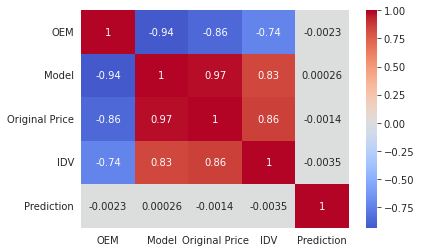

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)

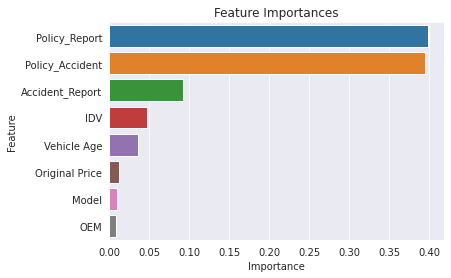

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the feature importance values using Seaborn
sns.set_style('darkgrid')
sns.barplot(x='importance', y='feature', data=feature_importances)


# add chart title and axis labels
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# show the plot
plt.show()

In [ ]:
with open('DLRoll.pkl', 'wb') as f:
    pickle.dump(reg_rf, f)